In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
print("The row count of the data set {}".format(data.shape[0]))

The row count of the data set 1338


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data.value_counts("sex")

sex
male      675
female    662
dtype: int64

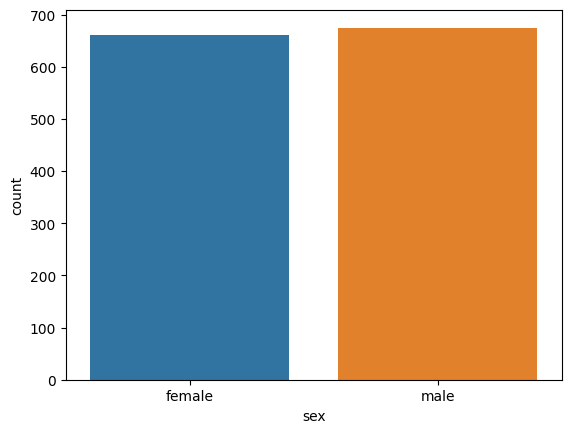

In [14]:
sns.countplot(x="sex",data=data)
plt.show()

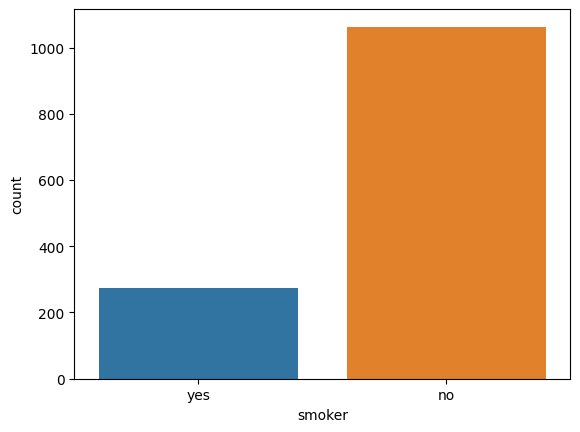

In [15]:
sns.countplot(x="smoker",data=data)
plt.show()

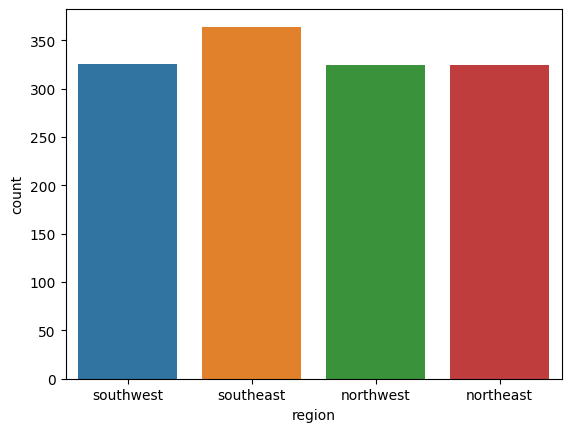

In [16]:
sns.countplot(x="region",data=data)
plt.show()

In [17]:
from sklearn import preprocessing

In [18]:
labelencoder=preprocessing.LabelEncoder()

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
data["smoker"]=labelencoder.fit_transform(data["smoker"])
data["sex"]=labelencoder.fit_transform(data["sex"])
data["region"]=labelencoder.fit_transform(data["region"])

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


In [26]:
data.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

This shows that smoking and age increaes charges

<AxesSubplot:>

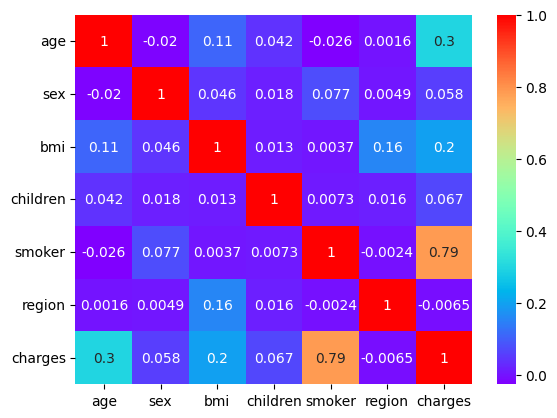

In [27]:
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

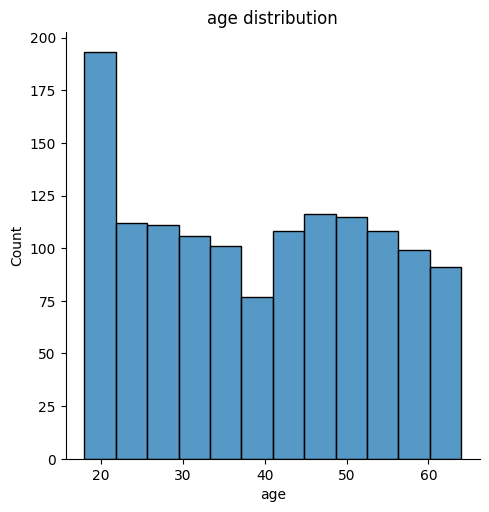

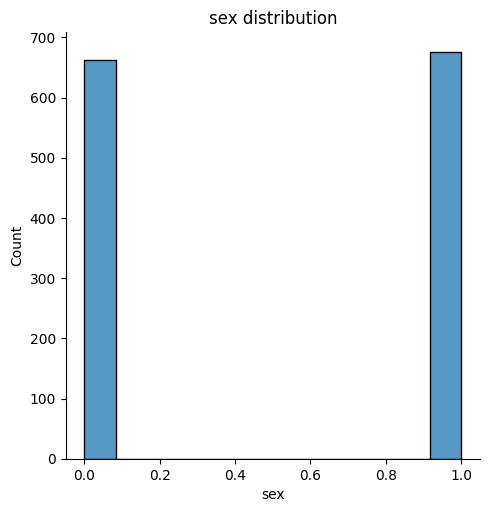

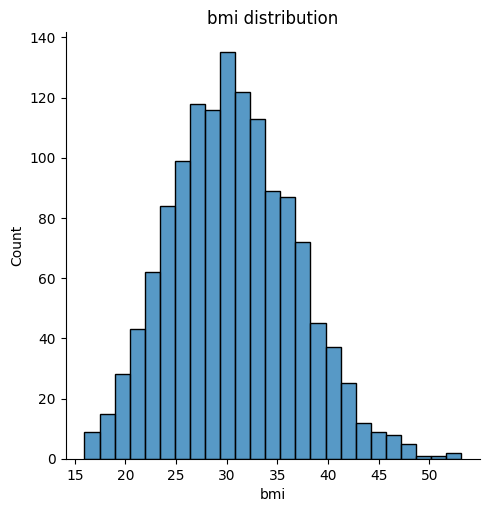

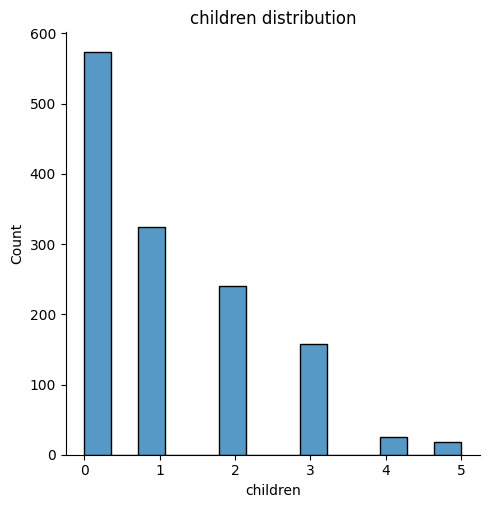

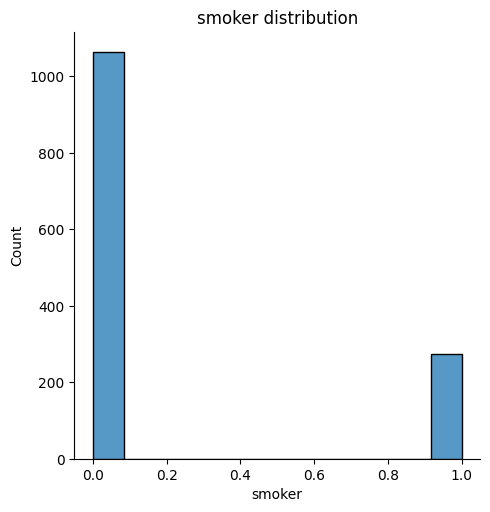

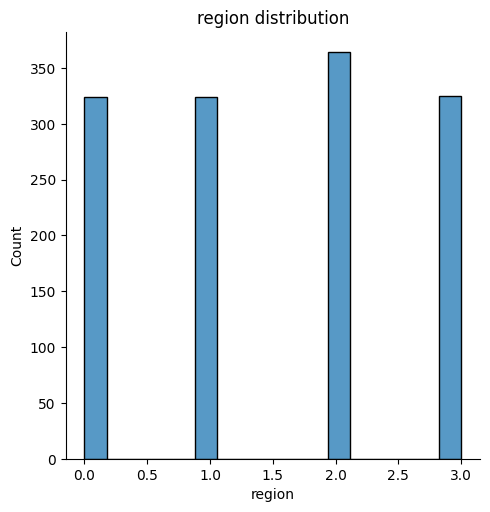

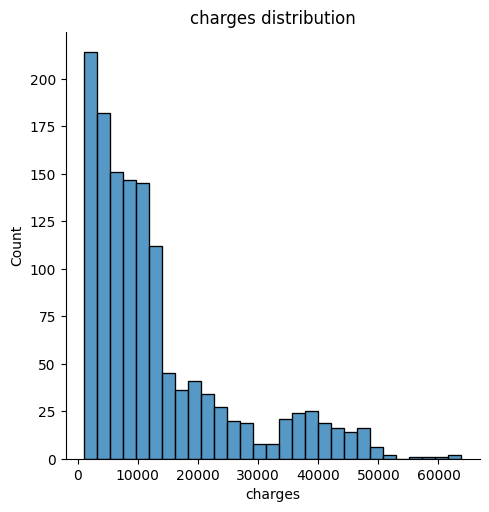

In [30]:
for i in data.columns:
    sns.displot(data[i])
    plt.title(i +" "+"distribution")
    plt.show()

BMI has a normal distibution

In [31]:
colorsforx=["Red","Green","Yellow","Black","Blue","Grey"]
colorschanger=0

In [32]:
for i in data.columns[:-1]:
    sns.scatterplot(data=data,x=i,y="charges",color=colorsforx[colorschanger])
    plt.show()
    colorschanger +=1

TypeError: list indices must be integers or slices, not list